In [4]:
import hipopy.hipopy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

In [5]:
#filename = '../projects/test.07.10.2024.10.27/dst/___1.5___20.0___0.0___0.01___0.01___0.01___neutron___.hipo'
# filename = '../projects/test.07.22.2024.11.53/dst/___2.5___30.0___10.0___0.01___0.01___0.01___neutron___.hipo'
# filename = '../projects/test.07.22.2024.11.53/dst/___2.5___30.0___10.0___0.01___0.01___0.01___neutron___.hipo'
filename = '../projects/test.08.06.2024.12.23/cooked/___2.0___20.0___0.0___0.01___0.01___0.01___neutron___.hipo'

In [6]:
file = hipopy.hipopy.open(filename,mode='r')
file.show()
file.readBank('REC::Particle')
file.readBank('ECAL::peaks')
file.readBank('ECAL::clusters')
file.getNamesAndTypes('REC::Particle')
file.getNamesAndTypes('MC::True')
#file.getNamesAndTypes('ECAL::clusters')

Dictionary :
	Schema : name = AHDC::Clusters , schemaString = {AHDC::Clusters/23000/25}{X/F,Y/F,Z/F}
	Schema : name = AHDC::Hits , schemaString = {AHDC::Hits/23000/23}{ID/S,layer/B,superlayer/B,wire/I,Doca/D}
	Schema : name = AHDC::KFTrack , schemaString = {AHDC::KFTrack/23000/26}{x/F,y/F,z/F,px/F,py/F,pz/F}
	Schema : name = AHDC::MC , schemaString = {AHDC::MC/23000/22}{x/F,y/F,z/F,px/F,py/F,pz/F}
	Schema : name = AHDC::PreClusters , schemaString = {AHDC::PreClusters/23000/24}{X/F,Y/F}
	Schema : name = AHDC::Track , schemaString = {AHDC::Track/23000/21}{x/F,y/F,z/F,px/F,py/F,pz/F}
	Schema : name = AHDC::tdc , schemaString = {AHDC::tdc/22400/12}{sector/B,layer/B,component/S,order/B,TDC/I}
	Schema : name = ATOF::adc , schemaString = {ATOF::adc/22500/11}{sector/B,layer/B,component/S,order/B,ADC/I,time/F,ped/S}
	Schema : name = BAND::adc , schemaString = {BAND::adc/22100/11}{sector/B,layer/B,component/S,order/B,ADC/I,amplitude/I,time/F,ped/S}
	Schema : name = BAND::hits , schemaString = {B

{'detector': 'B',
 'pid': 'I',
 'mpid': 'I',
 'tid': 'I',
 'mtid': 'I',
 'otid': 'I',
 'trackE': 'F',
 'totEdep': 'F',
 'avgX': 'F',
 'avgY': 'F',
 'avgZ': 'F',
 'avgLx': 'F',
 'avgLy': 'F',
 'avgLz': 'F',
 'px': 'F',
 'py': 'F',
 'pz': 'F',
 'vx': 'F',
 'vy': 'F',
 'vz': 'F',
 'mvx': 'F',
 'mvy': 'F',
 'mvz': 'F',
 'avgT': 'F',
 'nsteps': 'I',
 'procID': 'I',
 'hitn': 'I'}

In [7]:
file = hipopy.hipopy.open(filename,mode='r')
bank = "ECAL::adc"
for i, event in enumerate(file):
    my_dict = file.getNamesAndTypes(bank)
    
    for branch, branchtype in my_dict.items():
        if branchtype == "B":
            values = np.array(file.getBytes(bank,branch))
        elif branchtype == "I":
            values = np.array(file.getInts(bank,branch))
        elif branchtype == "F":
            values = np.array(file.getFloats(bank,branch))
        if len(values)>0:
            print("-",branch,f"({branchtype})","\n"+"-"*100,"\n\t",values,"\n")
    break

- sector (B) 
---------------------------------------------------------------------------------------------------- 
	 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4] 

- layer (B) 
---------------------------------------------------------------------------------------------------- 
	 [1 1 3 3 2 3 3 1 2 2 1 1 2 3 2 1 1 3 1 3 2 3 2 1 2 2 2 1 2 1 4 5 6 6 6 4 4
 4 1 2 3 3 3 1 1 2 2 1 3 2 2 3 3 2 1 3 1 1 1 2 1 1 1 3 3 3 2 4 5 3 3 1 1 5
 6 

# Plot Event-by-Event

In [8]:
def plot_1(*,Nskip=0,min_neutrons=1,min_photons=0,min_protons=0):
    file = hipopy.hipopy.open(filename,mode='r')
    j=0
    for i, event in enumerate(file):
        RECpx = np.array(file.getFloats("REC::Particle", "px"))
        RECpy = np.array(file.getFloats("REC::Particle", "py"))
        RECpz = np.array(file.getFloats("REC::Particle", "pz"))
        RECpid = np.array(file.getInts("REC::Particle", "pid"))

        MCpx = np.array(file.getFloats("MC::Lund", "px"))
        MCpy = np.array(file.getFloats("MC::Lund", "py"))
        MCpz = np.array(file.getFloats("MC::Lund", "pz"))
        MCpid = np.array(file.getInts("MC::Lund", "pid"))
        

        # Distance traveled in cm
        distance = 700  # cm

        # Find indices where the particle ID is 2112 (neutron)
        neutron_indices = (MCpid == 2112)

        # Get momentum components for neutrons
        neutron_px = MCpx[neutron_indices]
        neutron_py = MCpy[neutron_indices]
        neutron_pz = MCpz[neutron_indices]

        # Calculate x and y coordinates after traveling
        x = (neutron_px / neutron_pz) * distance
        y = (neutron_py / neutron_pz) * distance

        mc_lund_neutron_coordinates = np.vstack((x, y)).T
        

        # Skip events 
        if np.sum(RECpid==2112)<min_neutrons:
            continue
        if np.sum(RECpid==22)<min_photons:
            continue
        if np.sum(RECpid==2212)<min_protons:
            continue

        ECALxo = np.array(file.getFloats("ECAL::peaks", "xo"))
        ECALyo = np.array(file.getFloats("ECAL::peaks", "yo"))
        ECALzo = np.array(file.getFloats("ECAL::peaks", "zo"))

        ECALxe = np.array(file.getFloats("ECAL::peaks", "xe"))
        ECALye = np.array(file.getFloats("ECAL::peaks", "ye"))
        ECALze = np.array(file.getFloats("ECAL::peaks", "ze"))

        ECALclusterx = np.array(file.getFloats("ECAL::clusters", "x"))
        ECALclustery = np.array(file.getFloats("ECAL::clusters", "y"))
        ECALclusterz = np.array(file.getFloats("ECAL::clusters", "z"))

        RECcalox = np.array(file.getFloats("REC::Calorimeter", "x"))
        RECcaloy = np.array(file.getFloats("REC::Calorimeter", "y"))
        RECcaloz = np.array(file.getFloats("REC::Calorimeter", "z"))
        RECcalopindex = np.array(file.getShorts("REC::Calorimeter", "pindex"))


        if j < Nskip:
            j += 1
            continue
        else:
            break
            
    print(mc_lund_neutron_coordinates)
    # Create a 3D plot with two subplots
    fig = plt.figure(figsize=(10, 5), dpi=150)

    # First subplot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(ECALxo, ECALzo, ECALyo, c='b', label='ECAL::peaks (xo, yo, zo)')
    ax1.scatter(ECALxe, ECALze, ECALye, c='r', label='ECAL::peaks (xe, ye, ze)')
    ax1.scatter(ECALclusterx, ECALclusterz, ECALclustery, c='y', label='ECAL::clusters (x,y,z)')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Z')
    ax1.set_zlabel('Y')
    ax1.set_ylim(0, ax1.get_ylim()[1])
    xmax = np.amax(np.abs(ax1.get_xlim()))
    zmax = np.amax(np.abs(ax1.get_zlim()))
    ax1.set_xlim(-xmax, xmax)
    ax1.set_zlim(-zmax, zmax)
    ax1.legend(frameon=True)
    ax1.grid(True)

    # Second subplot
    ax2 = fig.add_subplot(122)
    ax2.scatter(ECALxo, ECALyo, c='b', label='ECAL::peaks (xo, yo)')
    ax2.scatter(ECALxe, ECALye, c='r', label='ECAL::peaks (xe, ye)')
    # Add faint lines connecting matched points
    for x0, y0, xe, ye in zip(ECALxo, ECALyo, ECALxe, ECALye):
        ax2.plot([x0, xe], [y0, ye], c='gray', alpha=0.3, linewidth=0.5)

    ax2.scatter(ECALclusterx, ECALclustery, c='y', label='ECAL::clusters (x,y)')
    ax2.scatter(RECcalox[RECpid[RECcalopindex]==2112], RECcaloy[RECpid[RECcalopindex]==2112], marker="x", color='black', label='REC::Calorimeter neutron (x,y)')
    ax2.scatter(RECcalox[RECpid[RECcalopindex]==11], RECcaloy[RECpid[RECcalopindex]==11], marker="^", color='magenta', label='REC::Calorimeter electron (x,y)')
    ax2.scatter(RECcalox[RECpid[RECcalopindex]==22], RECcaloy[RECpid[RECcalopindex]==22], marker="*", color='green', label='REC::Calorimeter photon (x,y)')
    ax2.scatter(RECcalox[RECpid[RECcalopindex]==2212], RECcaloy[RECpid[RECcalopindex]==2212], marker="s", color='orange', label='REC::Calorimeter proton (x,y)')
    # Annotate each unique neutron
    neutron_indices = RECcalopindex[RECpid[RECcalopindex]==2112]
    unique_neutron_indices = np.unique(neutron_indices)

    for i, index in enumerate(unique_neutron_indices, start=1):
        x = RECcalox[RECcalopindex == index][0]
        y = RECcaloy[RECcalopindex == index][0]
        ax2.annotate(f'$n_{i}$', (x, y), textcoords="offset points", xytext=(5*np.random.choice([-1,1]), 5*np.random.choice([-1,1])), ha='center',fontsize=12,color="black",fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.1'))
    # Annotate each unique electron
    electron_indices = RECcalopindex[RECpid[RECcalopindex]==11]
    unique_electron_indices = np.unique(electron_indices)

    for i, index in enumerate(unique_electron_indices, start=1):
        x = RECcalox[RECcalopindex == index][0]
        y = RECcaloy[RECcalopindex == index][0]
        ax2.annotate(f'$e_{i}$', (x, y), textcoords="offset points", xytext=(5*np.random.choice([-1,1]), 5*np.random.choice([-1,1])), ha='center',fontsize=12,color="black",fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.1'))
        
    
    # Annotate each unique photon
    photon_indices = RECcalopindex[RECpid[RECcalopindex]==22]
    unique_photon_indices = np.unique(photon_indices)

    for i, index in enumerate(unique_photon_indices, start=1):
        x = RECcalox[RECcalopindex == index][0]
        y = RECcaloy[RECcalopindex == index][0]
        ax2.annotate(f'$\gamma_{i}$', (x, y), textcoords="offset points", xytext=(5*np.random.choice([-1,1]), 5*np.random.choice([-1,1])), ha='center',fontsize=12,color="black",fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.1'))

    
    # Annotate each unique proton
    proton_indices = RECcalopindex[RECpid[RECcalopindex]==2212]
    unique_proton_indices = np.unique(proton_indices)

    for i, index in enumerate(unique_proton_indices, start=1):
        x = RECcalox[RECcalopindex == index][0]
        y = RECcaloy[RECcalopindex == index][0]
        ax2.annotate(f'$p_{i}$', (x, y), textcoords="offset points", xytext=(5*np.random.choice([-1,1]), 5*np.random.choice([-1,1])), ha='center',fontsize=12,color="black",fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.1'))
        
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_xlim(-xmax, xmax)
    ax2.set_ylim(-zmax, zmax)
    ax2.legend(frameon=True, bbox_to_anchor=(0.35, 1.2), loc='center', ncols=2)
    ax2.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

[[ 2.54891638e+02 -7.82173240e-03]]


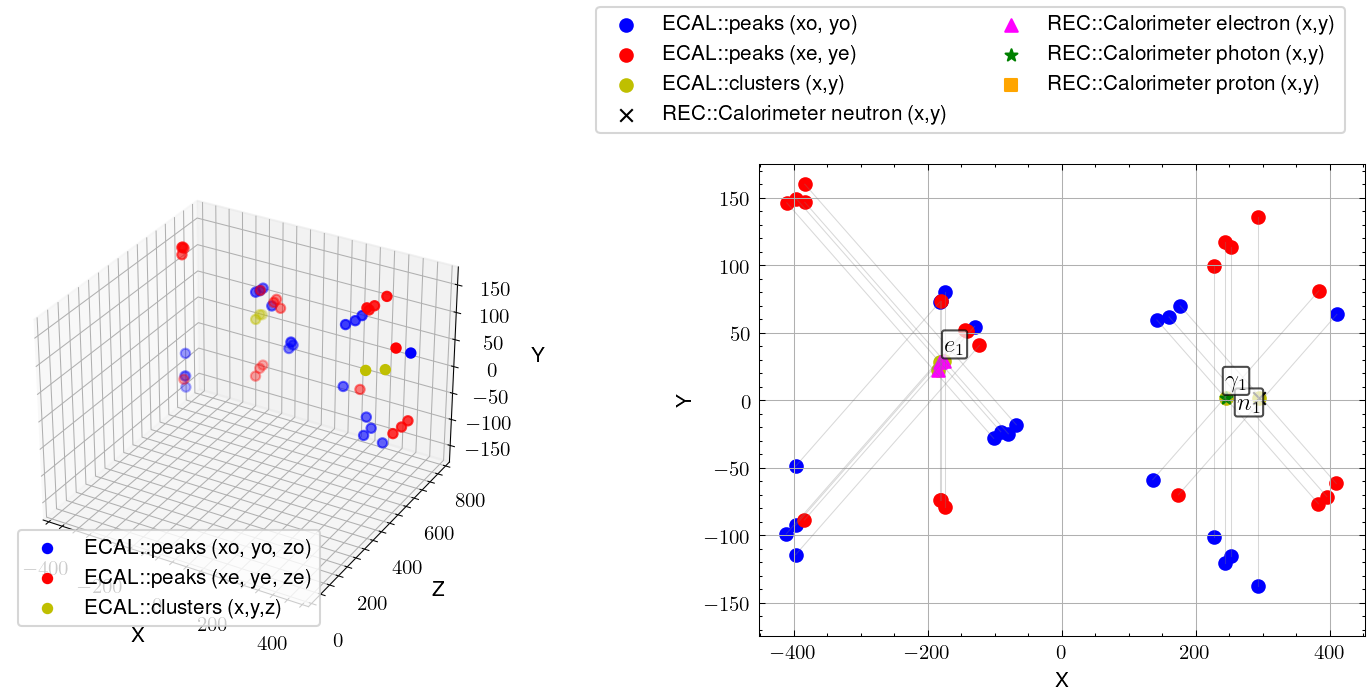

In [12]:
plot_1(Nskip=2,
       min_neutrons=1,
       min_photons=0,
       min_protons=0)

# Plot the Aggregate Location of the Clusters

In [47]:

def plot_2():
    file = hipopy.hipopy.open(filename, mode='r')
    
    RECcalox = []
    RECcaloy = []
    RECcalopindex = []
    RECpid = []
    
    for event in file:
        RECpid_event = np.array(file.getInts("REC::Particle", "pid"))
        RECcalox_event = np.array(file.getFloats("REC::Calorimeter", "x"))
        RECcaloy_event = np.array(file.getFloats("REC::Calorimeter", "y"))
        RECcalopindex_event = np.array(file.getShorts("REC::Calorimeter", "pindex"))
        
        RECpid.append(RECpid_event)
        RECcalox.append(RECcalox_event)
        RECcaloy.append(RECcaloy_event)
        RECcalopindex.append(RECcalopindex_event)
    
    neutron_x = []
    neutron_y = []
    proton_x = []
    proton_y = []
    electron_x = []
    electron_y = []
    photon_x = []
    photon_y = []
    
    for pid, x, y, pindex in zip(RECpid, RECcalox, RECcaloy, RECcalopindex):
        neutron_indices = np.where(pid[pindex] == 2112)[0]
        proton_indices = np.where(pid[pindex] == 2212)[0]
        electron_indices = np.where(pid[pindex] == 11)[0]
        photon_indices = np.where(pid[pindex] == 22)[0]
        
        neutron_x.extend(x[neutron_indices])
        neutron_y.extend(y[neutron_indices])
        proton_x.extend(x[proton_indices])
        proton_y.extend(y[proton_indices])
        electron_x.extend(x[electron_indices])
        electron_y.extend(y[electron_indices])
        photon_x.extend(x[photon_indices])
        photon_y.extend(y[photon_indices])
    
    # Convert lists to numpy arrays for plotting
    neutron_x = np.array(neutron_x)
    neutron_y = np.array(neutron_y)
    proton_x = np.array(proton_x)
    proton_y = np.array(proton_y)
    electron_x = np.array(electron_x)
    electron_y = np.array(electron_y)
    photon_x = np.array(photon_x)
    photon_y = np.array(photon_y)
    
    # Plotting the points
    fig, ax = plt.subplots(1, 1, dpi=150, figsize=(4, 4))
    ax.scatter(neutron_x, neutron_y, label='Neutrons (pid=2112)', color='blue', alpha=0.6)
    ax.scatter(proton_x, proton_y, label='Protons (pid=2212)', color='orange', alpha=0.6)
    ax.scatter(electron_x, electron_y, label='Electrons (pid=11)', color='red', alpha=0.6)
    ax.scatter(photon_x, photon_y, label='Photons (pid=22)', color='green', alpha=0.6)
    
    ax.set_xlabel('RECcalox')
    ax.set_ylabel('RECcaloy')
    ax.legend(frameon=True,loc='best')
    ax.grid(True)
    xmax = np.amax(np.abs(ax.get_xlim()))
    ymax = np.amax(np.abs(ax.get_ylim()))
    ax.set_xlim(-xmax, xmax)
    ax.set_ylim(-ymax, ymax)
    plt.show()

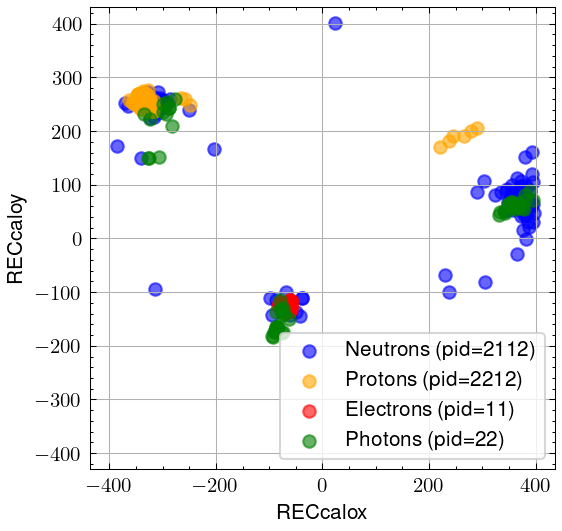

In [48]:
plot_2()